In [3]:
%pylab inline
plt.style.use('./BG.mplstyle')

%config InlineBackend.figure_format = 'retina'
import pickle
import pandas as pd

# a_file = open("./src/generated_files/input_hmm.pkl", "rb")
# input_hmm = pickle.load(a_file)

# unigram = input_hmm.get('unigram')
# bi_fut = input_hmm.get('bi_fut')
# bi_past = input_hmm.get('bi_past')

# df = pd.read_csv('./data_TM2/processed/processed_utterances_sentence_DA_labeling.csv', index_col=0)

## Sensitivity

In [6]:
c_file = open("./src/generated_files/dict_sensitivity_change_prob_matrix_HMM.pkl", "rb")
sensitivity = pickle.load(c_file)

In [7]:
print(sensitivity['mean_n_patterns_per_dialog'])
print(sensitivity['mean_len_patterns'])
print(sensitivity['norm_mean_n_patterns_per_dialog'])

[16.600821378991206, 16.520418787598334, 16.483283202221195, 16.441577973160573, 16.392526608051828, 16.331848681166125, 16.249074502545117, 16.103597871355852, 15.798241554835725, 14.978713558537715, 11.816404442387784, 2.859787135585377, 1.046737621471541, 1.0, 1.0, 1.0, 1.0, 1.0]
[2.000244710000111, 2.0105621335957093, 2.0156122163070886, 2.0214793559939164, 2.0285863528067765, 2.0376485057930935, 2.0505033646150226, 2.0733672652626662, 2.1207902060727353, 2.2491930945444913, 2.8558082077499813, 10.491166956954466, 29.263613861386137, nan, nan, nan, nan, nan]
[0.4882594523232708, 0.48589467022348043, 0.48480244712415277, 0.48357582274001687, 0.4821331355309361, 0.4803484906225331, 0.4779139559572093, 0.4736352315104662, 0.4646541633775213, 0.44055039878052105, 0.34754130712905246, 0.08411138634074639, 0.03078640063151591, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353]


In [8]:
sensitivity.keys()

dict_keys(['0.1', 'mean_n_patterns_per_dialog', 'norm_mean_n_patterns_per_dialog', 'max_n_patters', 'min_n_patters', 'var_n_patters', 'mean_len_patterns', 'norm_mean_len_patterns', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95'])

In [9]:
len(sensitivity.get('0.2'))

17288

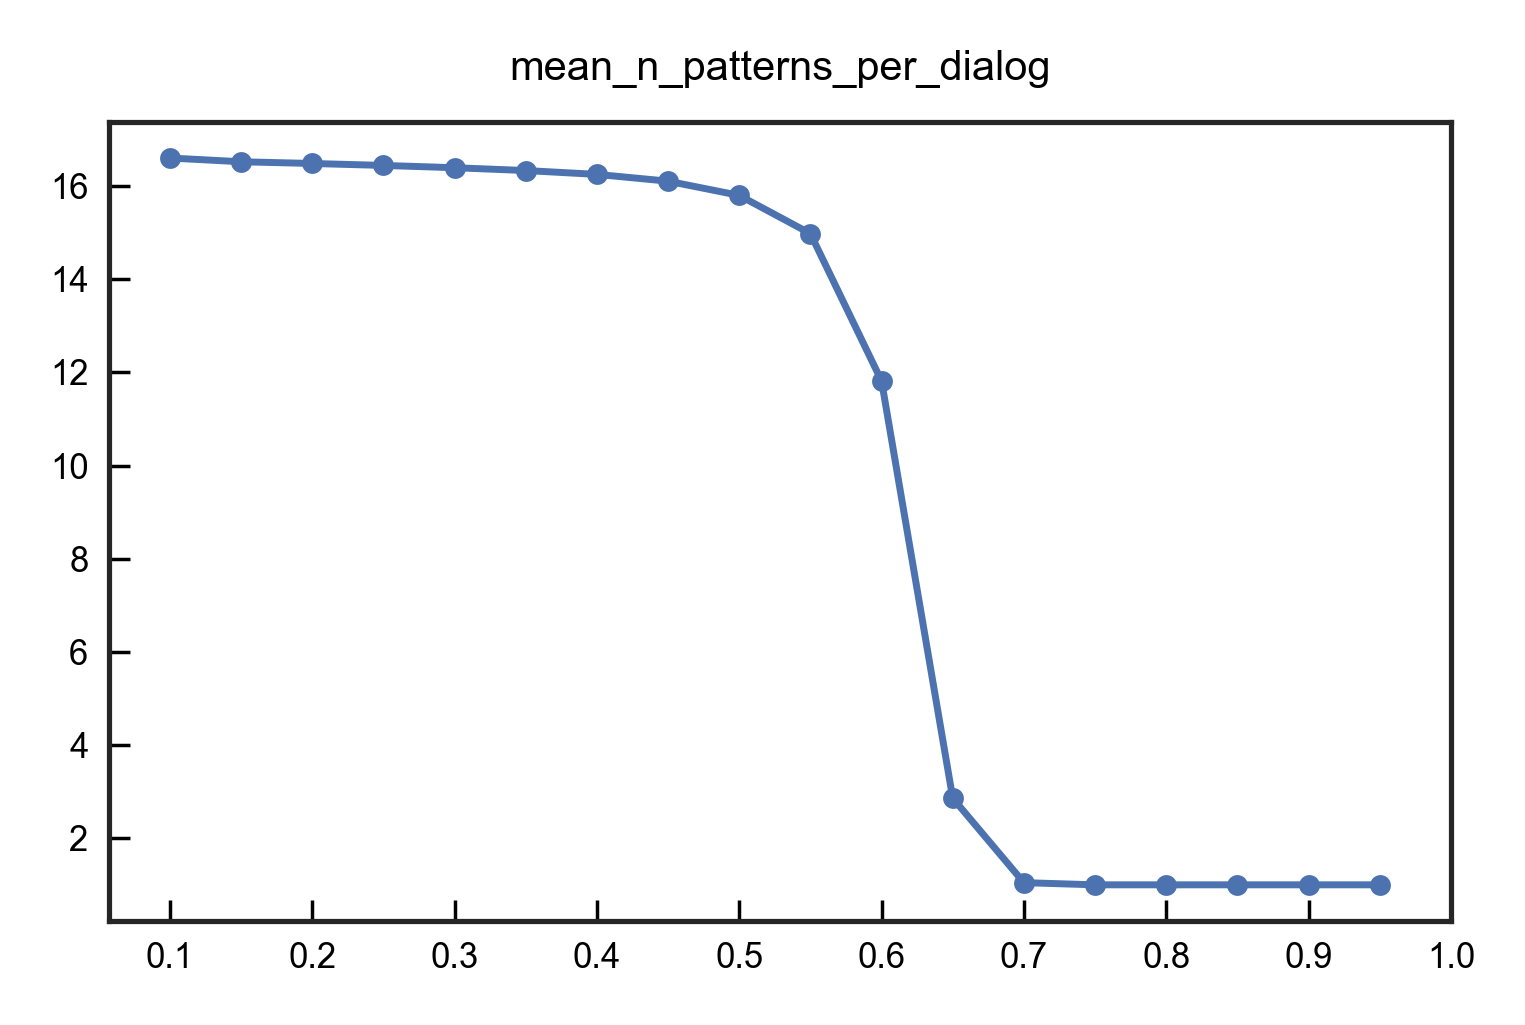

In [10]:

plt.rcParams["figure.autolayout"] = True
x = np.arange(0.1, 1.0, 0.05)
plt.title("mean_n_patterns_per_dialog")
plt.plot(x, sensitivity.get('mean_n_patterns_per_dialog'), 'o-')#, color="red")
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_mean_n_patterns_per_dialog.png')
plt.show()

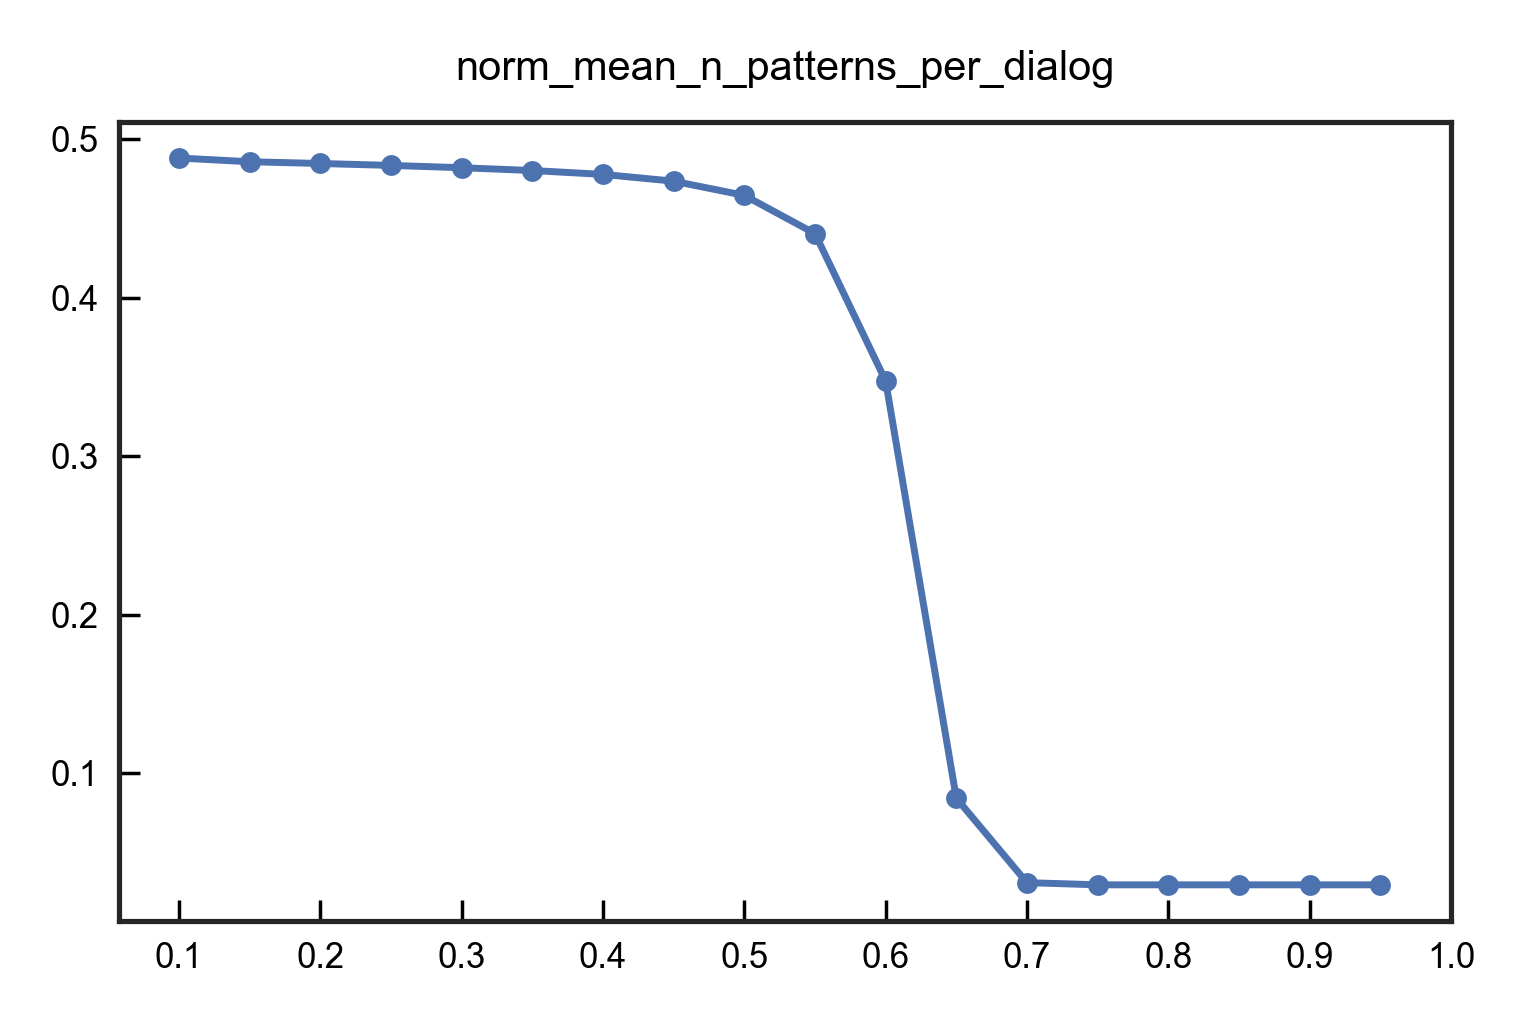

In [11]:
plt.rcParams["figure.autolayout"] = True
x = np.arange(0.1, 1.0, 0.05)
plt.title("norm_mean_n_patterns_per_dialog")
plt.plot(x, sensitivity.get('norm_mean_n_patterns_per_dialog'), 'o-')#, color="red")
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_norm_mean_n_patterns_per_dialog.png')
plt.show()

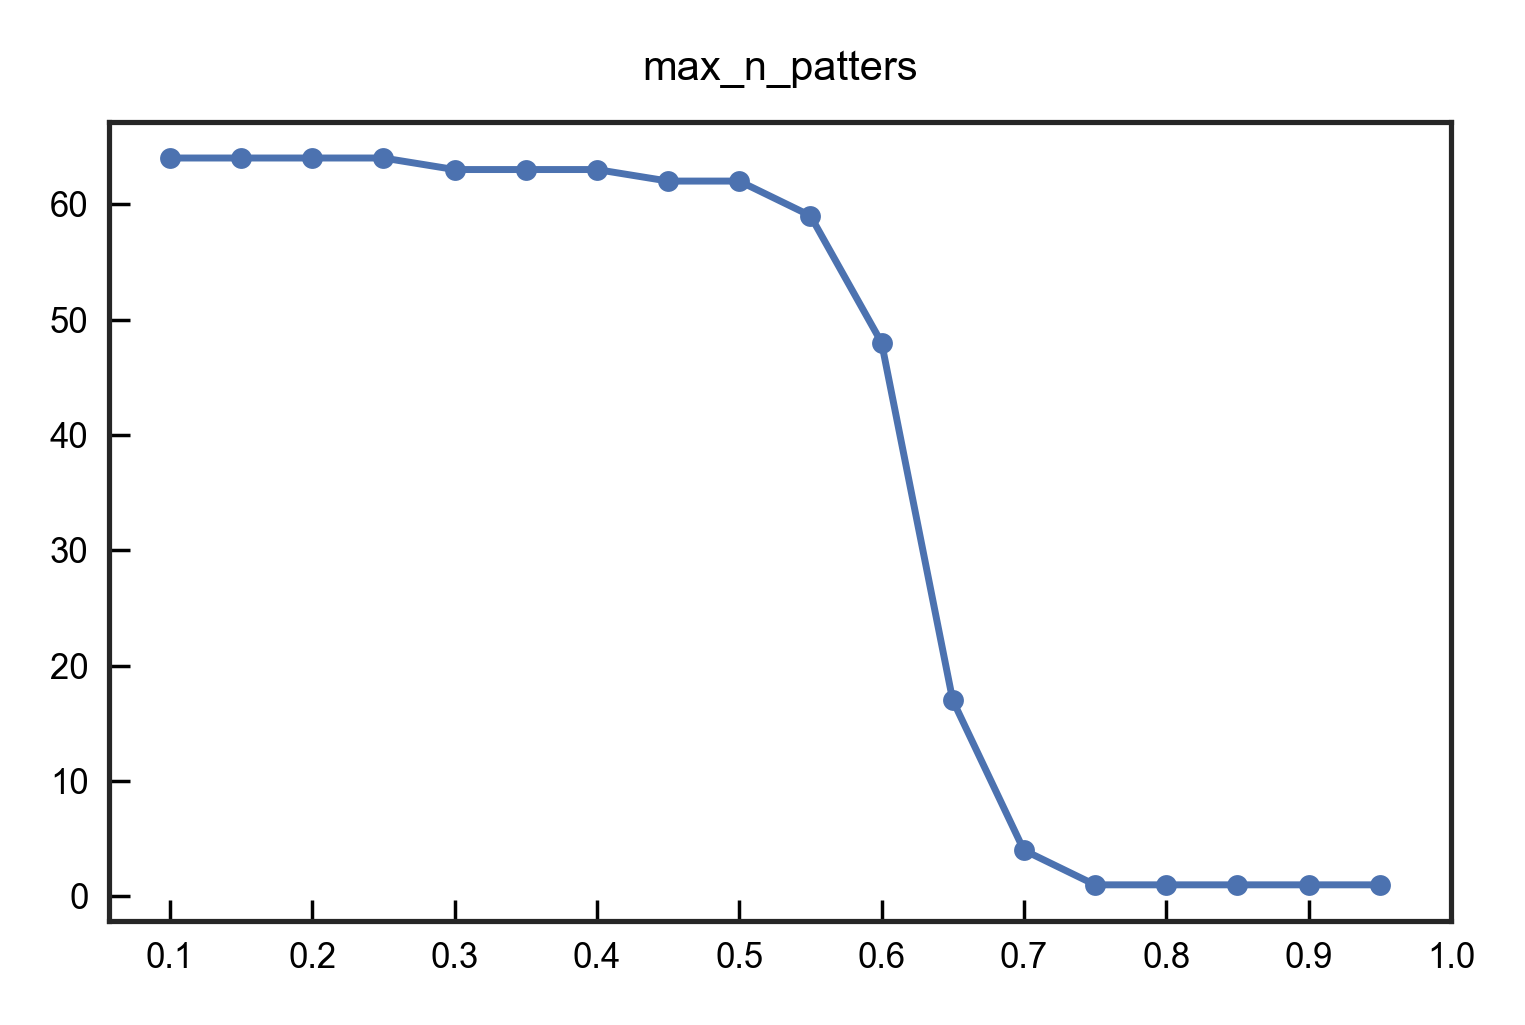

In [12]:
plt.rcParams["figure.autolayout"] = True
x = np.arange(0.1, 1.0, 0.05)
plt.title("max_n_patters")
plt.plot(x, sensitivity.get('max_n_patters'), 'o-')#, color="red")
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_max_n_patters.png')
plt.show()

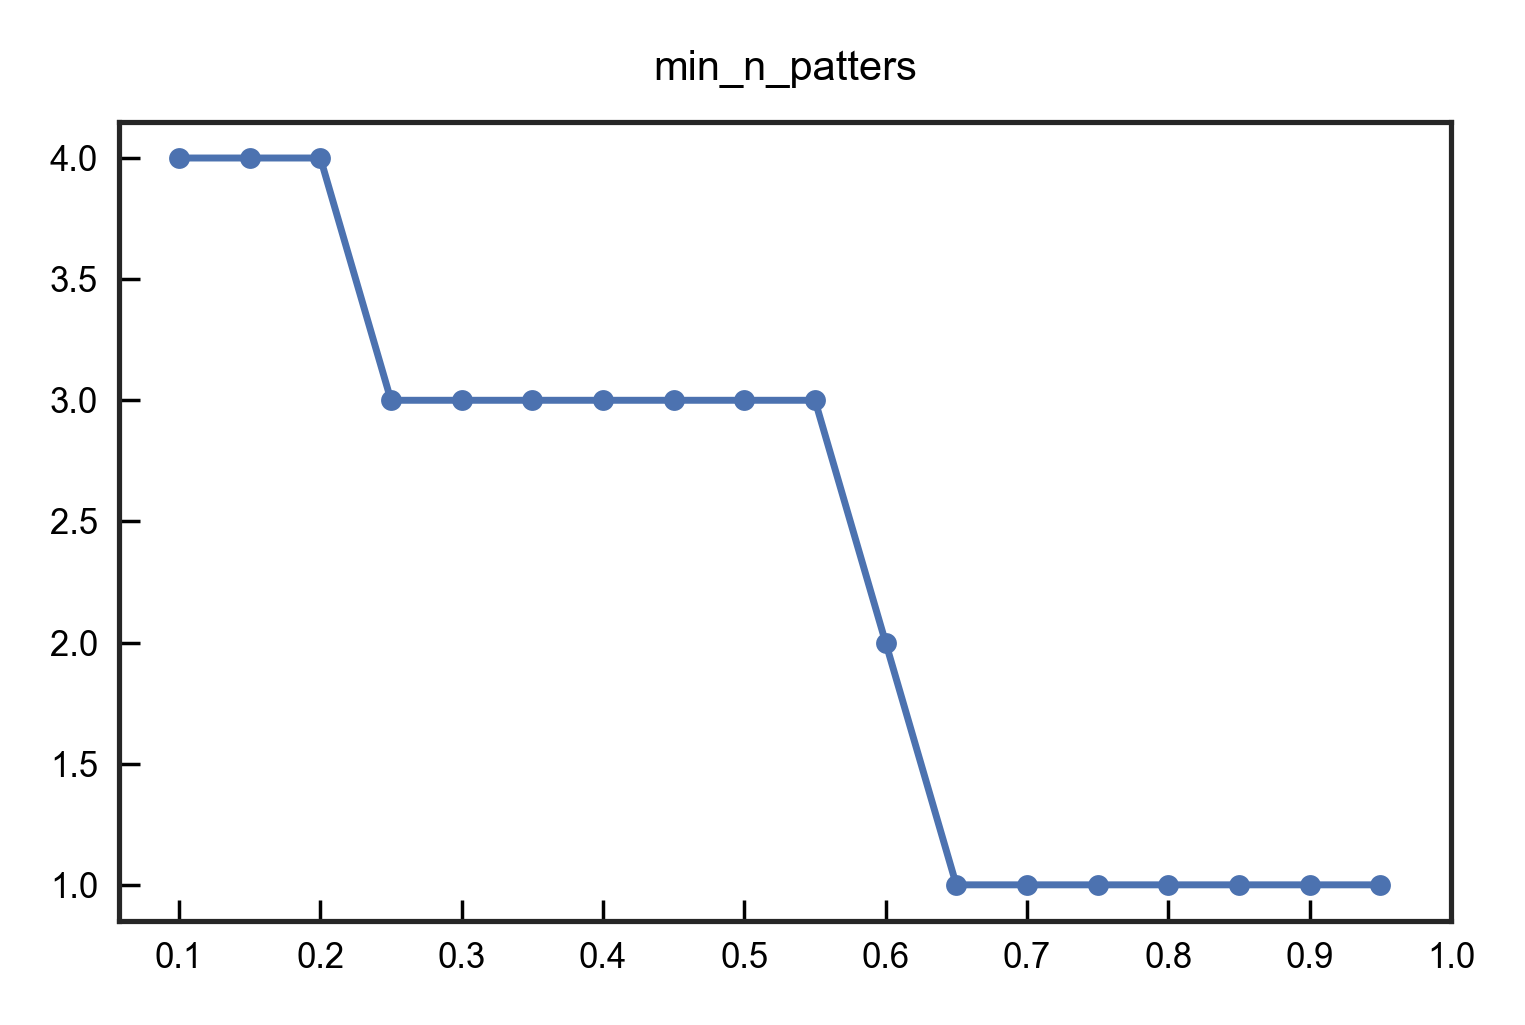

In [13]:
plt.rcParams["figure.autolayout"] = True

x = np.arange(0.1, 1.0, 0.05)
plt.title("min_n_patters")
plt.plot(x, sensitivity.get('min_n_patters'), 'o-')#, color="red")
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_min_n_patters.png')
plt.show()

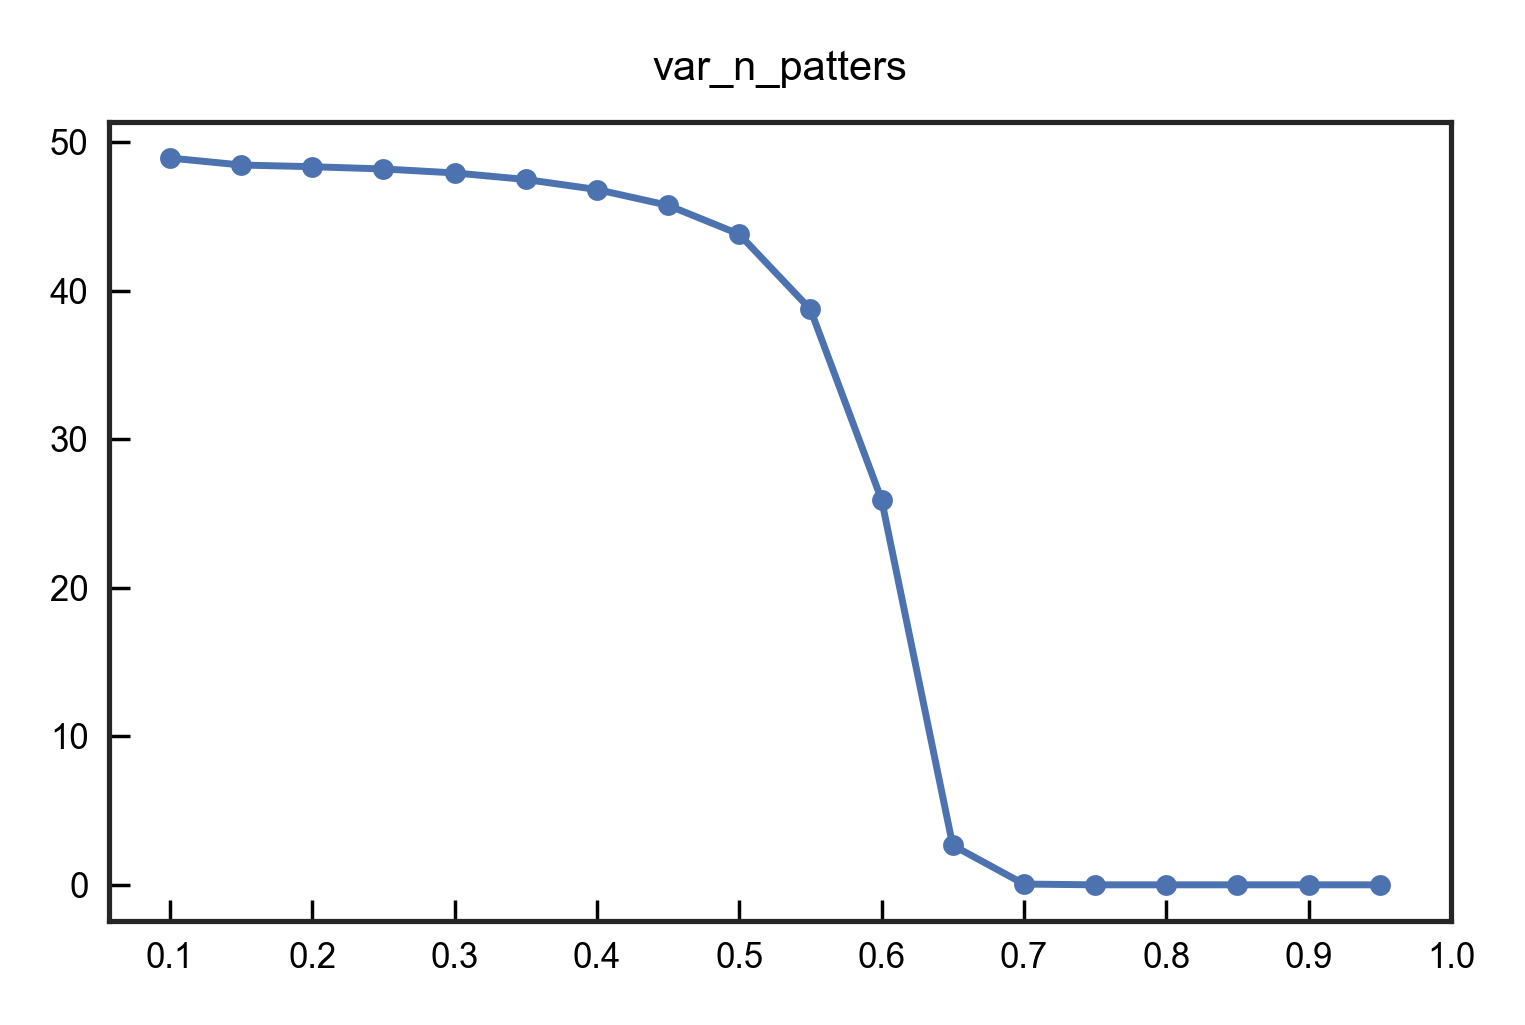

In [14]:
plt.rcParams["figure.autolayout"] = True


plt.title("var_n_patters")
plt.plot(x, sensitivity.get('var_n_patters'), 'o-')#, color="red")
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_var_n_patters.png')
plt.show()

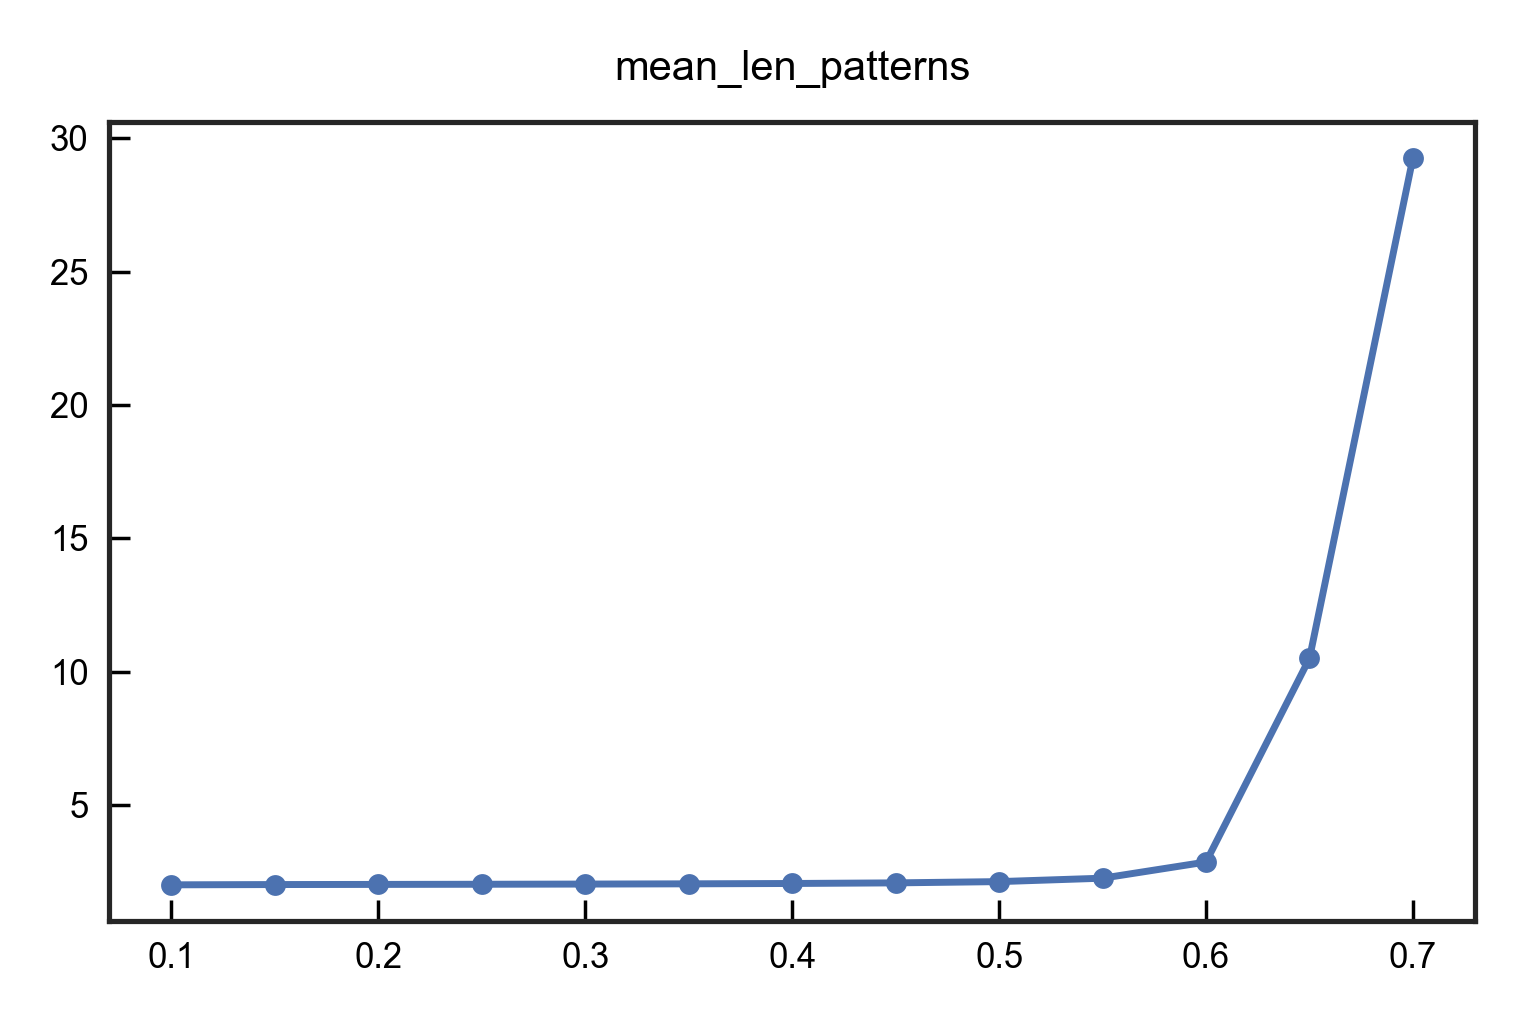

In [19]:
plt.rcParams["figure.autolayout"] = True

x = np.arange(0.1, 1.0, 0.05)
plt.title("mean_len_patterns")
plt.plot(x, sensitivity.get('mean_len_patterns'), 'o-')#, color="red")
# plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_mean_len_patterns.png')
plt.show()


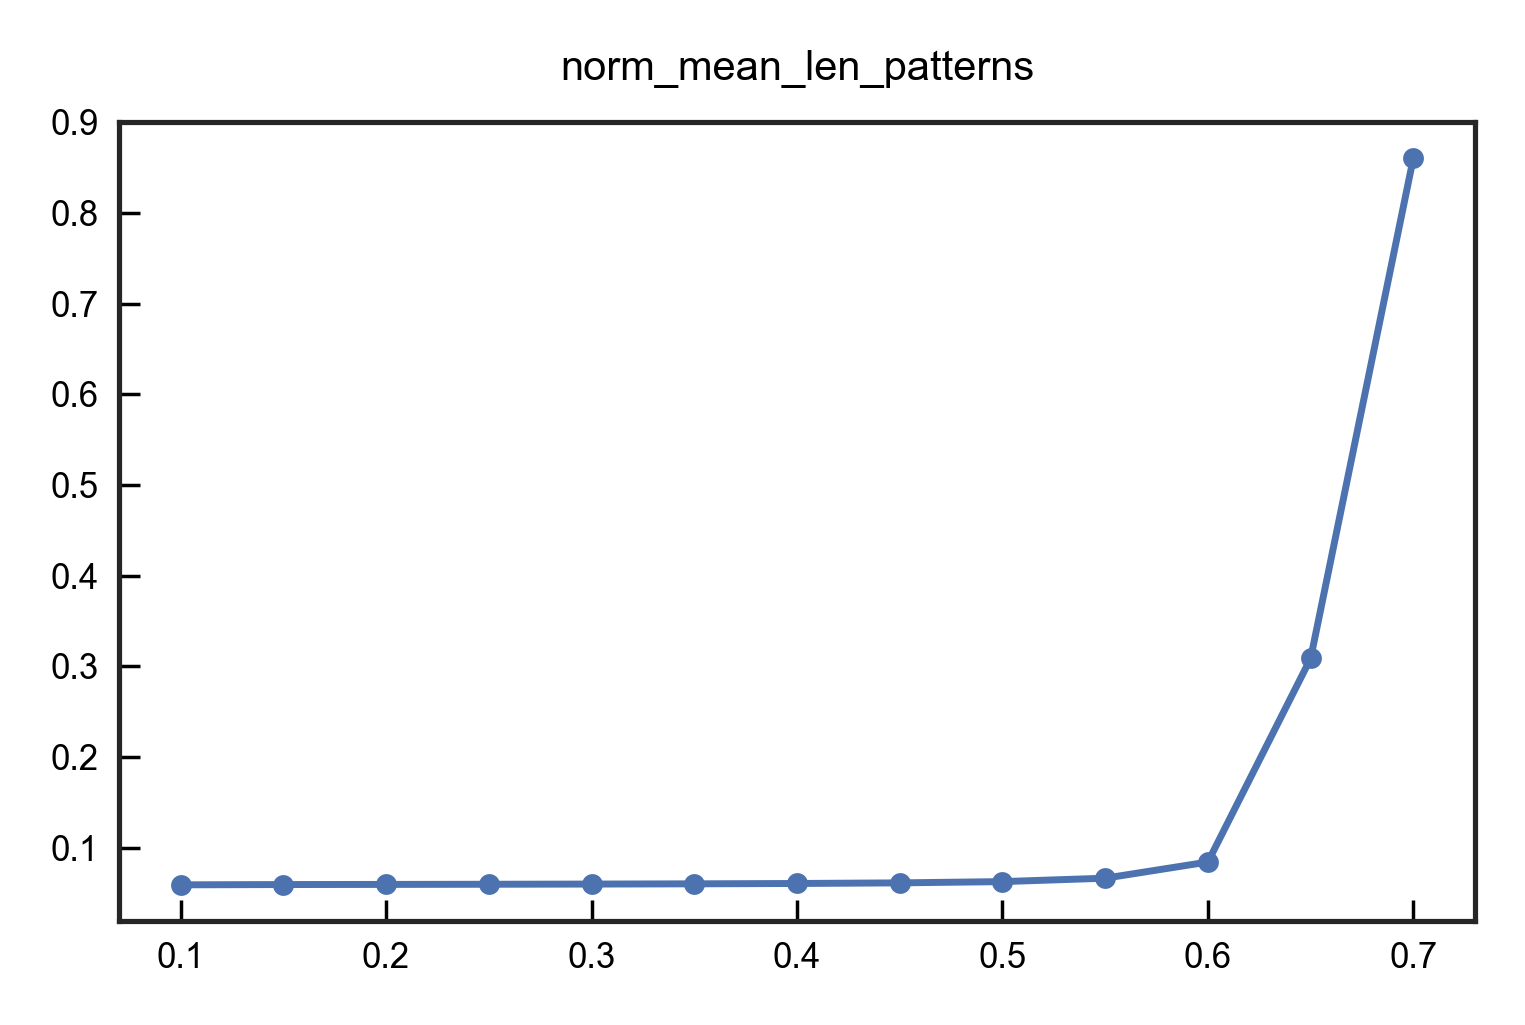

In [17]:
plt.rcParams["figure.autolayout"] = True
x = np.arange(0.1, 1.0, 0.05)
plt.title("norm_mean_len_patterns")
plt.plot(x, sensitivity.get('norm_mean_len_patterns'), 'o-')#, color="red")
# plt.xticks(np.arange(min(x), max(x)+0.1, 0.1))
plt.savefig('./src/generated_files/sensit_norm_mean_len_patterns.png')
plt.show()


## Most frequent starterd and enders of patterns

In [133]:
b_file = open("./src/generated_files/sorted_dict_HMM.pkl", "rb")
hmm = pickle.load(b_file)
hmm = dict( [(k,v) for k,v in hmm.items() if len(k)>0])

In [134]:
starters = []
enders = []

for key in hmm.keys():
    k = key.split()
    starters.append(k[0])
    enders.append(k[len(k)-1])

In [135]:
import collections

literal_count_st=collections.Counter(starters)
literal_count_end=collections.Counter(enders)

In [136]:
import pickle

c_file = open("./src/generated_files/hmm_results.pkl", "rb")
hmm_results = pickle.load(c_file)

#AUX FUNCT
def append_value(dict_obj, key, value):
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
        dict_obj[key].append(value)
    else:
        dict_obj[key] = value

def relative_count_st_end(hmm_results, literal_count_st, literal_count_end):

    relative_count_end = {}
    relative_count_st = {}
        
    count_DA = {}
    for e, i in enumerate(hmm_results):
        for f, j in enumerate(hmm_results[e][0]):
            append_value(count_DA, j, 1)

    for k, v in count_DA.items():
        count_DA[k] = len(v)


    for k, v in count_DAs.items():
        for ke, va in literal_count_end.items():
            if k == ke:
                relative_count_end[k] = va/v
                
    for k, v in count_DAs.items():
        for ke, va in literal_count_st.items():
            if k == ke:
                relative_count_st[k] = va/v

    return relative_count_end, relative_count_st  


rel_count_end, rel_count_st = relative_count_st_end(hmm_results, literal_count_st, literal_count_end)

In [137]:
# import pickle

# b_file = open("./src/generated_files/hmm_results.pkl", "rb")
# hmm_results = pickle.load(b_file)

# #AUX FUNCT
# def append_value(dict_obj, key, value):
#     if key in dict_obj:
#         if not isinstance(dict_obj[key], list):
#             dict_obj[key] = [dict_obj[key]]
#         dict_obj[key].append(value)
#     else:
#         dict_obj[key] = value
        
# count_DA = {}
# for e, i in enumerate(hmm_results):
#     for f, j in enumerate(hmm_results[e][0]):
#         append_value(count_DA, j, 1)
        
# # count_DAs = {}
# for k, v in count_DA.items():
#     count_DA[k] = len(v)
    
# relative_count_end = {}

# # def relative_count_st_end()
# for k, v in count_DAs.items():
#     for ke, va in literal_count_end.items():
#         if k == ke:
#             relative_count_end[k] = va/v
            
# relative_count_end  

In [138]:
def sort_dict_by_value(d, reverse = True):
    return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

sort_dict_by_value(rel_count_end)

{'U_partial_request': 0.08767111622064679,
 'A_detail_request': 0.07372860099078196,
 'A_sequence_closer': 0.06976744186046512,
 '<UNK>': 0.06204959907974422,
 'U_sequence_closer': 0.06111200731300748,
 'U_receipt': 0.057692307692307696,
 'U_greeting': 0.05300501931516569,
 'A_greeting': 0.033562080473994074,
 'A_receipt': 0.025712949976624593,
 'U_confirmation': 0.025188757058562276,
 'A_confirmation': 0.025087167276128922,
 'A_grant': 0.007738627275720939,
 'U_answer': 0.00626453337035366,
 'U_disconfirmation': 0.001388888888888889,
 'A_disconfirmation': 0.000782472613458529,
 'A_repair_initiator': 0.0006414368184733803,
 'A_hold_request': 0.00033944331296673454,
 'A_completion_check': 0.0001549426712116517}

In [139]:
sort_dict_by_value(rel_count_st)

{'U_completion_check': 0.14788732394366197,
 'U_receipt': 0.1282051282051282,
 'U_hold_request': 0.1111111111111111,
 'U_disconfirmation': 0.07777777777777778,
 'U_confirmation': 0.06994057060677199,
 'U_answer': 0.06566480408149099,
 'U_repair_initiator': 0.06363636363636363,
 'U_greeting': 0.06349039497542901,
 'A_grant': 0.05593451568894952,
 'A_disconfirmation': 0.051643192488262914,
 'U_partial_request': 0.05135083349300632,
 'A_hold_request': 0.04938900203665988,
 'A_repair_initiator': 0.046183450930083386,
 '<UNK>': 0.04374598233920898,
 'A_greeting': 0.04089323883451457,
 'A_confirmation': 0.036652776596649374,
 'A_completion_check': 0.034242330337775025,
 'A_receipt': 0.024544179523141654,
 'U_sequence_closer': 0.020298972952626768,
 'A_detail_request': 0.01832633097134257,
 'A_sequence_closer': 0.010705771220367954}

In [140]:
sort_dict_by_value(literal_count_end)

{'<UNK>': 5502,
 'A_detail_request': 4703,
 'U_partial_request': 4118,
 'U_sequence_closer': 2273,
 'U_greeting': 2017,
 'A_greeting': 1790,
 'A_sequence_closer': 1551,
 'U_confirmation': 1191,
 'A_confirmation': 1180,
 'U_answer': 361,
 'A_grant': 329,
 'A_receipt': 110,
 'U_receipt': 9,
 'A_hold_request': 2,
 'A_disconfirmation': 1,
 'A_repair_initiator': 1,
 'A_completion_check': 1,
 'U_disconfirmation': 1}

In [141]:
sort_dict_by_value(literal_count_st)

{'<UNK>': 3879,
 'U_answer': 3784,
 'U_confirmation': 3307,
 'U_greeting': 2416,
 'U_partial_request': 2412,
 'A_grant': 2378,
 'A_greeting': 2181,
 'A_confirmation': 1724,
 'A_detail_request': 1169,
 'U_sequence_closer': 755,
 'A_hold_request': 291,
 'A_sequence_closer': 238,
 'A_completion_check': 221,
 'A_receipt': 105,
 'A_repair_initiator': 72,
 'A_disconfirmation': 66,
 'U_disconfirmation': 56,
 'U_repair_initiator': 35,
 'U_completion_check': 21,
 'U_receipt': 20,
 'U_hold_request': 10}

In [142]:
len(sort_dict_by_value(literal_count_end)) == len(sort_dict_by_value(rel_count_end))

True

In [143]:
len(sort_dict_by_value(literal_count_st)) == len(sort_dict_by_value(rel_count_st))

True